In [14]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from grape.state_vector.multiqubitgates import Pulse, Evolution, Inversion, CXCascade
from grape.state_vector.circuit import Circuit, OneQubitEntanglementAlternation
from grape.state_vector.gradient_optimization import GradientOptimization
from grape.optimizer_old import GradientDescent

def norm(matrix1, matrix2):
    return ((matrix1 - matrix2) @ (matrix1 - matrix2).conjugate().T).trace()

cx = np.asarray([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex)

toffoli = np.asarray([[1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 1, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0],
                      [0, 0, 0, 1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 0, 1, 0]], dtype=complex)

hamiltonian = np.zeros((3, 3))
hamiltonian[0][1] = 0.1385
hamiltonian[1][2] = 0.01304
hamiltonian[0][2] = 0.00148

target = toffoli
size = int(np.log2(target.shape[0]))
circuit = Circuit(size)
for i in range(2 * size):
    circuit += Pulse(size, "nmr")
    circuit += Evolution(size)
circuit += Pulse(size, "nmr")

opt = GradientOptimization(target, circuit, optimizer="adam")
opt.randomize_params()
opt.set_hamiltonian(hamiltonian[:size][:size])

noopt = GradientOptimization(target, copy.deepcopy(circuit), optimizer=None)
noopt.set_hamiltonian(hamiltonian[:size][:size])

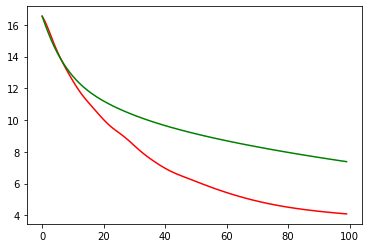

In [15]:
opt_loss = opt.descend(steps=100, track_distance=True)
noopt_loss = noopt.descend(steps=100, track_distance=True)
plt.plot(opt_loss, color="red", label="opt")
plt.plot(noopt_loss, color="green", label="noopt")
